In [1]:
# Import the necessary packages
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Suppress specific future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the clean data
data = pd.read_pickle('source\data.pkl')

data.info()

# Copy of the original dataset for feature engineering and preprocessing
data_processed = data.copy()

# Drop unnecessary columns
data_processed = data_processed.drop(['AccID', 'birth_year', 'vehicleID', 'num_veh'], axis=1)

# Convert 'day', 'month', and 'time' to integers
data_processed['day'] = data_processed['day'].astype(int)
data_processed['month'] = data_processed['month'].astype(int)
data_processed['time'] = data_processed['time'].astype(int)

# Cyclical encoding for temporal features
data_processed['day_sin'] = np.sin(2 * np.pi * data_processed['day'] / 31)  
data_processed['day_cos'] = np.cos(2 * np.pi * data_processed['day'] / 31)

data_processed['month_sin'] = np.sin(2 * np.pi * data_processed['month'] / 12)
data_processed['month_cos'] = np.cos(2 * np.pi * data_processed['month'] / 12)

data_processed['time_sin'] = np.sin(2 * np.pi * data_processed['time'] / 86340000) 
data_processed['time_cos'] = np.cos(2 * np.pi * data_processed['time'] / 86340000)

data_processed.drop(columns=['day','month','time'],inplace=True)

# Selecting features and target variable
features_dummy = ['year', 'lum', 'atm_condition', 'collision_type',
       'route_category', 'traffic_regime', 'total_number_lanes',
       'reserved_lane_code', 'longitudinal_profile', 'plan',
       'surface_condition', 'infra', 'accident_situation',
       'traffic_direction', 'vehicle_category', 'fixed_obstacle',
       'mobile_obstacle', 'initial_impact_point', 'manv', 'motor', 'seat',
       'user_category', 'gender', 'reason_travel',
       'safety_equipment1']

# These features will be standardized
features_scaler = ['lat', 'long', 'upstream_terminal_number', 'distance_upstream_terminal', 'maximum_speed', 'age']

# These features are between -1 and 1 and do not need any standardazations. 
features_temporal = ['day_sin', 'day_cos', 'month_sin', 'month_cos', 'time_sin', 'time_cos']
target = 'gravity'

X = data_processed.drop(columns=[target])
y = data_processed[target]
y = y.astype(int)

X = pd.get_dummies(X, columns=features_dummy, drop_first=True)

# stratify will split the dataset according to the distribution of the classes to compensate for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardization: Fit only on the training data, then apply to both train and test
scaler = StandardScaler()
X_train[features_scaler] = scaler.fit_transform(X_train[features_scaler])
X_test[features_scaler] = scaler.transform(X_test[features_scaler])

# Check the dimensions
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447670 entries, 0 to 447669
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AccID                       447670 non-null  object 
 1   day                         447670 non-null  object 
 2   month                       447670 non-null  object 
 3   year                        447670 non-null  object 
 4   time                        447670 non-null  object 
 5   lum                         447670 non-null  object 
 6   atm_condition               447670 non-null  object 
 7   collision_type              447670 non-null  object 
 8   lat                         447670 non-null  float64
 9   long                        447670 non-null  float64
 10  route_category              447670 non-null  object 
 11  traffic_regime              447670 non-null  object 
 12  total_number_lanes          447670 non-null  object 
 13  reserved_lane_

C:\Users\sd10725\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7613 - loss: 0.5371 - val_accuracy: 0.7788 - val_loss: 0.4931
Epoch 2/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7858 - loss: 0.4836 - val_accuracy: 0.7841 - val_loss: 0.4888
Epoch 3/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7887 - loss: 0.4780 - val_accuracy: 0.7846 - val_loss: 0.4867
Epoch 4/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7910 - loss: 0.4734 - val_accuracy: 0.7863 - val_loss: 0.4838
Epoch 5/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7918 - loss: 0.4702 - val_accuracy: 0.7854 - val_loss: 0.4843
Epoch 6/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7927 - loss: 0.4672 - val_accuracy: 0.7861 - val_loss: 0.4820
Epoch 7/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7949 - loss: 0.4637 - val_accuracy: 0.7850 - val_loss: 0.4841
Epoch 8/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 

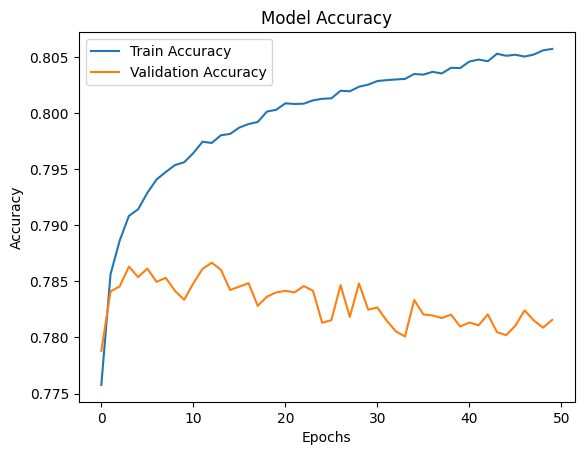

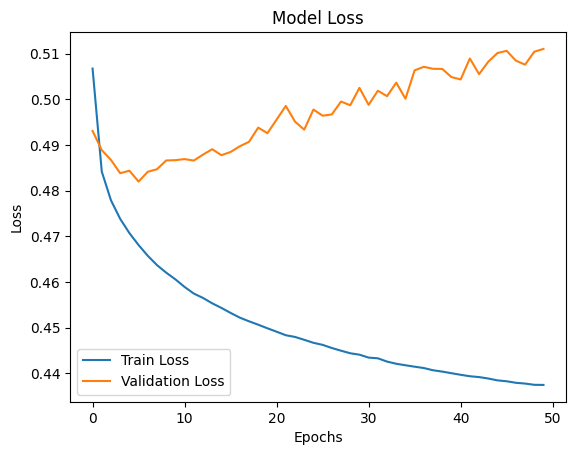

2798/2798 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step
Confusion Matrix:
[[29817    23  7697]
 [  149   188  1919]
 [ 9486   283 39972]]


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Correct the labels if needed (replace 4 with 3)
y_train = np.where(y_train == 4, 3, y_train)
y_test = np.where(y_test == 4, 3, y_test)

# Create a neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))

# Output layer for 4 classes (0, 1, 2, 3)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# Generate confusion matrix (optional)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


C:\Users\sd10725\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7246 - loss: 0.6712 - val_accuracy: 0.7726 - val_loss: 0.5464
Epoch 2/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7644 - loss: 0.5708 - val_accuracy: 0.7738 - val_loss: 0.5394
Epoch 3/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7652 - loss: 0.5676 - val_accuracy: 0.7743 - val_loss: 0.5395
Epoch 4/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7655 - loss: 0.5683 - val_accuracy: 0.7760 - val_loss: 0.5386
Epoch 5/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7661 - loss: 0.5673 - val_accuracy: 0.7737 - val_loss: 0.5415
Epoch 6/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7643 - loss: 0.5686 - val_accuracy: 0.7758 - val_loss: 0.5355
Epoch 7/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7673 - loss: 0.5644 - val_accuracy: 0.7760 - val_loss: 0.5364
Epoch 8/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 

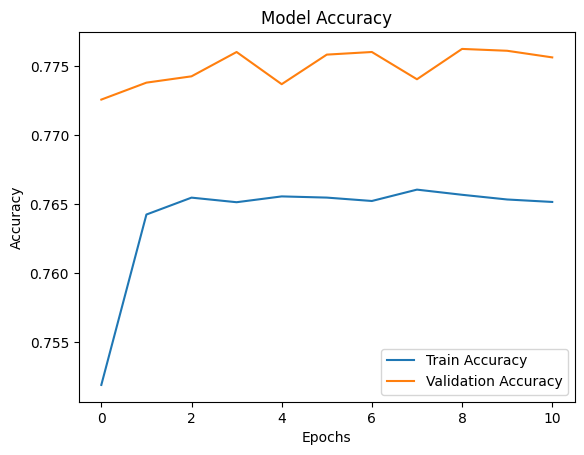

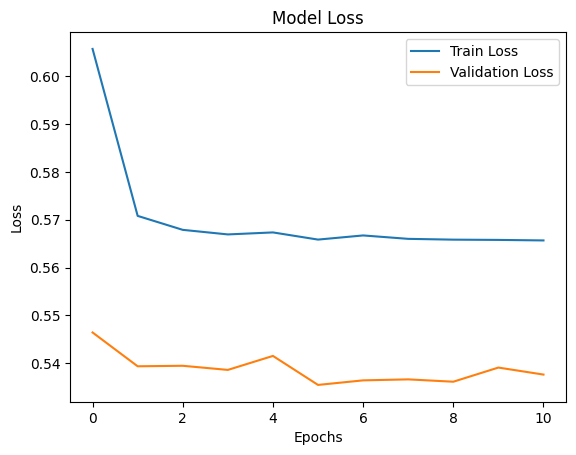

2798/2798 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Confusion Matrix:
[[28262     0  9275]
 [  146     0  2110]
 [ 8539     0 41202]]


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a neural network model with Dropout and L2 regularization
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Add dropout with 50% probability

# Hidden layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Add dropout with 50% probability

# Output layer for 4 classes (0, 1, 2, 3)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# Generate confusion matrix (optional)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


In [17]:
from sklearn.neural_network import MLPClassifier

# Create a neural network using scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, activation='relu', solver='adam')
mlp.fit(X_train, y_train)

# Evaluate the model
score = mlp.score(X_test, y_test)
print(f"Accuracy: {score:.4f}")


Accuracy: 0.7540


In [24]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming model is already trained and X_test is available
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels if necessary

# Check the unique classes in y_test
print(np.unique(y_test))

# Based on the output, update target_names with the correct number of classes
report = classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3'])  # Adjust the names based on the actual number of classes
print(report)



2798/2798 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step
[0 1 2]
              precision    recall  f1-score   support

     Class 1       0.77      0.76      0.77     37537
     Class 2       0.10      0.73      0.18      2256
     Class 3       0.81      0.59      0.68     49741

    accuracy                           0.67     89534
   macro avg       0.56      0.69      0.54     89534
weighted avg       0.77      0.67      0.70     89534



In [22]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Adjust the labels to start from 0
y_train = y_train - 1
y_test = y_test - 1

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\sd10725\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6064 - loss: 0.7724 - val_accuracy: 0.6418 - val_loss: 0.7012
Epoch 2/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6491 - loss: 0.6744 - val_accuracy: 0.6447 - val_loss: 0.7069
Epoch 3/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6531 - loss: 0.6678 - val_accuracy: 0.6564 - val_loss: 0.7148
Epoch 4/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6583 - loss: 0.6501 - val_accuracy: 0.6549 - val_loss: 0.7268
Epoch 5/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6614 - loss: 0.6521 - val_accuracy: 0.6852 - val_loss: 0.6570
Epoch 6/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6669 - loss: 0.6406 - val_accuracy: 0.6650 - val_loss: 0.6865
Epoch 7/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6693 - loss: 0.6382 - val_accuracy: 0.6606 - val_loss: 0.7075
Epoch 8/50
11192/11192 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 